In [1]:
#Shared/Utility scripts
import sys
sys.path.insert(0, '..') #sys allows for the .ipynb file to connect to the shared folder files
import os
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")
#set path directory
HOME = os.path.expanduser('~')
cwd = os.getcwd()

In [5]:
#Put in model of interest for evaluation, NWIS/USGS site id(s), and the start/end date
from shared_scripts import Reach_Eval
model = 'LSTM'  #Modify Reach Eval to support multiple models (i.e NWM, MLP, LSTM1,LSTM2...)
year = 'Multilocation'
#get NWIS ids from prediction file
with open(f"{HOME}/NWM_ML/Predictions/Hindcast/{model}/{year}/{model}_predictions.pkl", "rb") as f:
    # Decompress data from file
    predictions = pkl.load(f)
NWIS_list = list(predictions.keys())
#plot list of top performing sites
Eval_Metric = 'KGE'
startDT ='2019-1-01'
endDT ='2020-9-20'

Reach_Eval = Reach_Eval.Reach_Eval(model , NWIS_list, startDT, endDT, cwd)

#Get Streamstats and colocated NHD reaches
Reach_Eval.get_NHD_Model_info()

#Get USGS and NWM data
Reach_Eval.prepare_comparison()

Getting geospatial information for NHD reaches


Dropping USGS sites with no NHD reach
Getting  LSTM  data


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


In [6]:
#Plot the locations
Reach_Eval.Map_Plot_Eval('D', supply = False)

Plotting monitoring station locations


NWIS_site_id  NHD_reachid  \
0      10133800     10276836   
1      10133980     10276712   
2      10164500     10329013   
3      10149000     10349162   
4      10153100     10348934   
5      10105900       666170   
6      10133650     10276856   
7      10145400     10331031   
8      10137500     10274270   
9      10134500     10277268   
10     10140100     10275828   
11     10140700     10274376   
12     10136500     10274616   
13     10141000     10273232   
14     10155000     10373622   
15     10155200     10373794   
16     10126000      4605050   
17     10171000     10390290   
18     10129900     10093082   
19     10157500     10375690   

                                             Location  RMSE  MaxError  \
0             EAST CANYON CREEK NEAR JEREMY RANCH, UT    36       179   
1   EAST CANYON CREEK AB EAST CYN RES NR MORGAN, UTAH    61       308   
2   AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK...    68       309   
3      SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT    18        55   
4      HOBBLE CREEK AT 1650 WEST AT SPRINGVILLE, UTAH    74       442   
5                   LITTLE BEAR RIVER AT PARADISE, UT   127       759   
6      E CANYON CR BL I-80 REST STOP NR PARK CITY, UT    26        64   
7       SALT CRK BL NEPHI POWERPLANT DIV NR NEPHI, UT    37       149   
8          SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT   158       688   
9                   EAST CANYON CREEK NEAR MORGAN, UT    54       146   
10      OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT   239      1508   
11          OGDEN RIVER NR GIBSON AVENUE AT OGDEN, UT   320      1710   
12                         WEBER RIVER AT GATEWAY, UT   548      2230   
13                    WEBER RIVER NEAR PLAIN CITY, UT   595      3066   
14                     PROVO RIVER NEAR HAILSTONE, UT   624      2318   
15     PROVO RIV AT RIV ROAD BRIDGE NR HEBER CITY, UT   392      1672   
16                        BEAR RIVER NEAR CORINNE, UT  1620      4288   
17     JORDAN RIVER @ 1700 SOUTH @ SALT LAKE CITY, UT    96       185   
18        SILVER CREEK NEAR SILVER CREEK JUNCTION, UT    32        38   
19                    DANIELS CREEK AT CHARLESTON, UT    37        74   

            MAPE       KGE  Drainage_area_mi2  Mean_Basin_Elev_ft  \
0     115.091768 -0.018482            64.6000              7420.0   
1      75.308741 -0.097749           115.0000              7240.0   
2     139.586607 -0.163923            51.1000              8470.0   
3      58.024011 -0.181330            15.3000              7600.0   
4      56.869657 -0.187110                NaN                 NaN   
5      48.649497 -0.246270           180.0000              6700.0   
6     243.664845 -0.268194            42.1000              7620.0   
7     386.344749 -0.279548             2.2700              7820.0   
8      50.883908 -0.292409           137.0000              7220.0   
9     176.786924 -0.298261           152.0000              7090.0   
10    133.158344 -0.340517             0.0929              6060.0   
11     74.165386 -0.398106           333.0000              6690.0   
12     71.399643 -0.410017          1620.0000              7170.0   
13     62.840591 -0.423234                NaN                 NaN   
14     62.457305 -0.465766           229.0000              8640.0   
15     77.340420 -0.470825           269.0000              8360.0   
16     92.978967 -0.479591          7040.0000              6620.0   
17     63.299352 -0.664123          3430.0000              6440.0   
18    609.970576 -2.615608                NaN                 NaN   
19  14340.646229 -5.106801            49.8000              7610.0   

    Perc_Forest  Perc_Imperv  Perc_Herbace  Mean_Ann_Precip_in  Ann_low_cfs  \
0          65.4      3.65000          2.63                26.2       16.000   
1          65.5      2.13000          3.45                26.4       24.900   
2          71.5      0.01730          3.42                39.4       16.800   
3          56.0      0.03720  

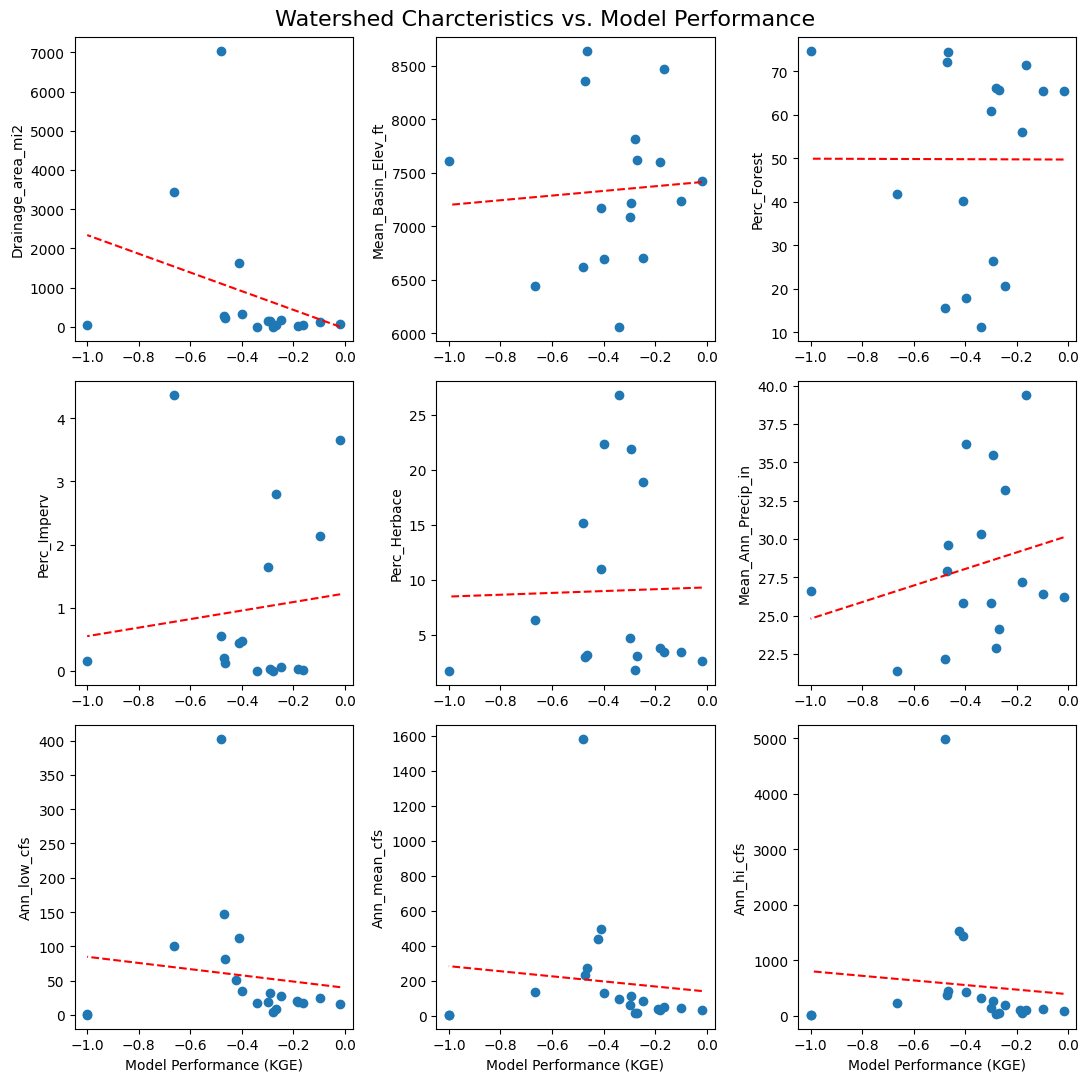

EAST CANYON CREEK NEAR JEREMY RANCH, UT


USGS: 10133800  LSTM: 10276836
Datetime                                           
2019-01-01 12:00:00       11.028021       38.059550
2019-01-02 12:00:00       11.050938       38.821507
2019-01-03 12:00:00       10.620729       39.121640
2019-01-04 12:00:00       10.715834       39.291134
2019-01-05 12:00:00       10.698646       39.384280
...                             ...             ...
2020-09-16 12:00:00        7.871250       38.442097
2020-09-17 12:00:00        8.574688       38.438976
2020-09-18 12:00:00        8.296979       38.435825
2020-09-19 12:00:00       12.113438       38.432728
2020-09-20 12:00:00        8.960313       38.429615

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133800 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10276836 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK AB EAST CYN RES NR MORGAN, UTAH


USGS: 10133980  LSTM: 10276712
Datetime                                           
2019-01-01 12:00:00       16.666668       38.099728
2019-01-02 12:00:00       16.416666       38.863390
2019-01-03 12:00:00       15.833333       39.164486
2019-01-04 12:00:00       16.500000       39.333195
2019-01-05 12:00:00       16.316668       39.426130
...                             ...             ...
2020-09-16 12:00:00       12.408333       38.517650
2020-09-17 12:00:00       12.012500       38.514492
2020-09-18 12:00:00       12.083333       38.511333
2020-09-19 12:00:00       15.728125       38.508183
2020-09-20 12:00:00       14.723958       38.505077

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133980 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10276712 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK, UT


USGS: 10164500  LSTM: 10329013
Datetime                                           
2019-01-01 12:00:00        7.773889       37.721394
2019-01-02 12:00:00        7.890000       38.482105
2019-01-03 12:00:00        7.908333       38.781560
2019-01-04 12:00:00        7.321861       38.948017
2019-01-05 12:00:00        7.300000       39.039997
...                             ...             ...
2020-09-16 12:00:00       14.731250       38.459286
2020-09-17 12:00:00       14.002084       38.456196
2020-09-18 12:00:00       14.000000       38.453114
2020-09-19 12:00:00       13.966666       38.450040
2020-09-20 12:00:00       13.900000       38.447002

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10164500 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10329013 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT


USGS: 10149000  LSTM: 10349162
Datetime                                           
2019-01-01 12:00:00       22.550000       37.844630
2019-01-02 12:00:00       22.349998       38.605373
2019-01-03 12:00:00       22.250000       38.904873
2019-01-04 12:00:00       22.200000       39.071370
2019-01-05 12:00:00       22.349998       39.163350
...                             ...             ...
2020-09-16 12:00:00       24.257292       38.583910
2020-09-17 12:00:00       24.228125       38.580822
2020-09-18 12:00:00       24.300001       38.577740
2020-09-19 12:00:00       24.312500       38.574680
2020-09-20 12:00:00       24.375000       38.571613

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10149000 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10349162 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

HOBBLE CREEK AT 1650 WEST AT SPRINGVILLE, UTAH


USGS: 10153100  LSTM: 10348934
Datetime                                           
2019-01-01 12:00:00       21.307291       38.095820
2019-01-02 12:00:00       16.780209       38.856495
2019-01-03 12:00:00       17.222918       39.155950
2019-01-04 12:00:00       16.063541       39.322384
2019-01-05 12:00:00       15.127083       39.414350
...                             ...             ...
2020-09-16 12:00:00       18.948960       38.834440
2020-09-17 12:00:00       18.766666       38.831326
2020-09-18 12:00:00       20.054167       38.828250
2020-09-19 12:00:00       16.616667       38.825190
2020-09-20 12:00:00       24.568750       38.822124

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10153100 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10348934 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

LITTLE BEAR RIVER AT PARADISE, UT


USGS: 10105900  LSTM: 666170
Datetime                                         
2019-01-01 12:00:00       31.398958     39.792576
2019-01-02 12:00:00       33.495834     40.555386
2019-01-03 12:00:00       35.079166     40.855960
2019-01-04 12:00:00       34.506250     41.022984
2019-01-05 12:00:00       35.078125     41.115270
...                             ...           ...
2020-09-16 12:00:00       18.108334     40.265842
2020-09-17 12:00:00       19.503124     40.262737
2020-09-18 12:00:00       18.868752     40.259663
2020-09-19 12:00:00       18.941668     40.256550
2020-09-20 12:00:00       19.613543     40.253483

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10105900 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_666170   :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

E CANYON CR BL I-80 REST STOP NR PARK CITY, UT


USGS: 10133650  LSTM: 10276856
Datetime                                           
2019-01-01 12:00:00        3.481539       37.990460
2019-01-02 12:00:00        6.057143       38.752476
2019-01-03 12:00:00        7.879583       39.052640
2019-01-04 12:00:00        8.261771       39.222180
2019-01-05 12:00:00       10.298750       39.315350
...                             ...             ...
2020-09-16 12:00:00        4.724792       38.371937
2020-09-17 12:00:00        4.671250       38.368780
2020-09-18 12:00:00        4.756563       38.365680
2020-09-19 12:00:00        4.654062       38.362600
2020-09-20 12:00:00        5.336458       38.359530

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133650 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10276856 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

SALT CRK BL NEPHI POWERPLANT DIV NR NEPHI, UT


USGS: 10145400  LSTM: 10331031
Datetime                                           
2019-01-01 12:00:00        3.605104       37.424427
2019-01-02 12:00:00        3.276875       38.185345
2019-01-03 12:00:00        3.253437       38.484960
2019-01-04 12:00:00        3.244479       38.651516
2019-01-05 12:00:00        3.506146       38.743557
...                             ...             ...
2020-09-16 12:00:00        5.390000       38.163616
2020-09-17 12:00:00        5.533333       38.160550
2020-09-18 12:00:00        5.191667       38.157475
2020-09-19 12:00:00        5.283333       38.154423
2020-09-20 12:00:00        5.670000       38.151370

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10145400 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10331031 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT


USGS: 10137500  LSTM: 10274270
Datetime                                           
2019-01-01 12:00:00       25.960000       40.553715
2019-01-02 12:00:00       25.766666       41.317074
2019-01-03 12:00:00       28.716667       41.620213
2019-01-04 12:00:00       30.666666       41.791126
2019-01-05 12:00:00       32.233334       41.887737
...                             ...             ...
2020-09-16 12:00:00       53.602080       40.907040
2020-09-17 12:00:00       53.425000       40.896830
2020-09-18 12:00:00       52.716667       40.886640
2020-09-19 12:00:00       49.943752       40.877390
2020-09-20 12:00:00       49.683334       40.868725

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10137500 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10274270 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK NEAR MORGAN, UT


USGS: 10134500  LSTM: 10277268
Datetime                                           
2019-01-01 12:00:00        5.775104       39.125330
2019-01-02 12:00:00        5.789583       39.889454
2019-01-03 12:00:00        5.804479       40.190388
2019-01-04 12:00:00        5.818334       40.358820
2019-01-05 12:00:00        5.833854       40.452465
...                             ...             ...
2020-09-16 12:00:00       88.158330       39.674465
2020-09-17 12:00:00       88.200000       39.666836
2020-09-18 12:00:00       88.200000       39.659360
2020-09-19 12:00:00       88.200000       39.652332
2020-09-20 12:00:00       88.200000       39.644337

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10134500 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10277268 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT


USGS: 10140100  LSTM: 10275828
Datetime                                           
2019-01-01 12:00:00       12.000000       40.016155
2019-01-02 12:00:00       12.012500       40.776318
2019-01-03 12:00:00       12.000000       41.075330
2019-01-04 12:00:00       12.003125       41.241450
2019-01-05 12:00:00       12.000000       41.333225
...                             ...             ...
2020-09-16 12:00:00       20.755209       40.760334
2020-09-17 12:00:00       21.719791       40.757175
2020-09-18 12:00:00       22.136460       40.754070
2020-09-19 12:00:00       23.085417       40.750950
2020-09-20 12:00:00       21.701042       40.747868

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140100 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10275828 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

OGDEN RIVER NR GIBSON AVENUE AT OGDEN, UT


USGS: 10140700  LSTM: 10274376
Datetime                                           
2019-01-01 12:00:00       18.660416       41.071760
2019-01-02 12:00:00       19.030209       41.835820
2019-01-03 12:00:00       19.193750       42.138560
2019-01-04 12:00:00       19.335417       42.308315
2019-01-05 12:00:00       19.159374       42.403385
...                             ...             ...
2020-09-16 12:00:00       72.934370       41.235960
2020-09-17 12:00:00       70.161460       41.226520
2020-09-18 12:00:00       62.668750       41.217327
2020-09-19 12:00:00       78.328125       41.208630
2020-09-20 12:00:00       78.008330       41.200367

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140700 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10274376 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

WEBER RIVER AT GATEWAY, UT


USGS: 10136500  LSTM: 10274616
Datetime                                           
2019-01-01 12:00:00       43.652775       39.644337
2019-01-02 12:00:00       28.516666       40.407658
2019-01-03 12:00:00       28.016666       40.708860
2019-01-04 12:00:00       29.616667       40.877920
2019-01-05 12:00:00       30.133333       40.973003
...                             ...             ...
2020-09-16 12:00:00      277.333340       40.207363
2020-09-17 12:00:00      288.697900       40.197430
2020-09-18 12:00:00      277.218750       40.187830
2020-09-19 12:00:00      252.093750       40.178913
2020-09-20 12:00:00      284.177100       40.170490

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10136500 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10274616 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

WEBER RIVER NEAR PLAIN CITY, UT


USGS: 10141000  LSTM: 10273232
Datetime                                           
2019-01-01 12:00:00       66.993750       40.000156
2019-01-02 12:00:00       66.979164       40.763660
2019-01-03 12:00:00       63.639584       41.065258
2019-01-04 12:00:00       60.506250       41.234547
2019-01-05 12:00:00       57.378124       41.329760
...                             ...             ...
2020-09-16 12:00:00      126.075000       40.472843
2020-09-17 12:00:00      173.531250       40.462880
2020-09-18 12:00:00      180.927080       40.453182
2020-09-19 12:00:00      162.822920       40.444120
2020-09-20 12:00:00      212.822920       40.435580

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10141000 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10273232 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

PROVO RIVER NEAR HAILSTONE, UT


USGS: 10155000  LSTM: 10373622
Datetime                                           
2019-01-01 12:00:00       87.800000       37.733418
2019-01-02 12:00:00       87.800000       38.494755
2019-01-03 12:00:00       87.800000       38.794674
2019-01-04 12:00:00       87.800000       38.964092
2019-01-05 12:00:00       87.800000       39.059895
...                             ...             ...
2020-09-16 12:00:00       42.934376       38.278300
2020-09-17 12:00:00       38.768750       38.275097
2020-09-18 12:00:00       40.072918       38.271915
2020-09-19 12:00:00       47.213540       38.268690
2020-09-20 12:00:00       48.142708       38.265507

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155000 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10373622 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

PROVO RIV AT RIV ROAD BRIDGE NR HEBER CITY, UT


USGS: 10155200  LSTM: 10373794
Datetime                                           
2019-01-01 12:00:00       132.00000       38.722660
2019-01-02 12:00:00       131.84375       39.482937
2019-01-03 12:00:00       133.05208       39.781918
2019-01-04 12:00:00       140.00000       39.950428
2019-01-05 12:00:00       140.00000       40.045567
...                             ...             ...
2020-09-16 12:00:00       252.50000       39.544430
2020-09-17 12:00:00       251.30208       39.538030
2020-09-18 12:00:00       254.53125       39.531773
2020-09-19 12:00:00       258.65625       39.525494
2020-09-20 12:00:00       260.34375       39.519130

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155200 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10373794 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

BEAR RIVER NEAR CORINNE, UT


USGS: 10126000  LSTM: 4605050
Datetime                                          
2019-01-01 12:00:00       846.00000      40.457820
2019-01-02 12:00:00       827.00000      41.220333
2019-01-03 12:00:00       798.00000      41.520634
2019-01-04 12:00:00       717.50000      41.688640
2019-01-05 12:00:00       709.00000      41.782160
...                             ...            ...
2020-09-16 12:00:00       560.54736      40.528805
2020-09-17 12:00:00       549.25000      40.521862
2020-09-18 12:00:00       464.63540      40.515780
2020-09-19 12:00:00       435.41666      40.510350
2020-09-20 12:00:00       396.94790      40.505848

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10126000 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_4605050  :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

JORDAN RIVER @ 1700 SOUTH @ SALT LAKE CITY, UT


USGS: 10171000  LSTM: 10390290
Datetime                                           
2019-01-01 12:00:00      111.666664       38.641544
2019-01-02 12:00:00      111.468750       39.401882
2019-01-03 12:00:00      111.197914       39.701206
2019-01-04 12:00:00      111.000000       39.867550
2019-01-05 12:00:00      110.239586       39.959454
...                             ...             ...
2020-09-16 12:00:00      169.333330       39.378407
2020-09-17 12:00:00      166.520830       39.375156
2020-09-18 12:00:00      166.458330       39.371967
2020-09-19 12:00:00      166.833330       39.368740
2020-09-20 12:00:00      168.291670       39.365550

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10171000 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10390290 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

SILVER CREEK NEAR SILVER CREEK JUNCTION, UT


USGS: 10129900  LSTM: 10093082
Datetime                                           
2019-01-01 12:00:00        3.773438       38.132580
2019-01-02 12:00:00        3.553854       38.893192
2019-01-03 12:00:00        3.325313       39.192577
2019-01-04 12:00:00        3.328125       39.358936
2019-01-05 12:00:00        3.365417       39.450880
...                             ...             ...
2020-09-16 12:00:00        2.822083       38.870785
2020-09-17 12:00:00        2.938854       38.867702
2020-09-18 12:00:00        2.281354       38.864643
2020-09-19 12:00:00        2.716250       38.861584
2020-09-20 12:00:00        3.289896       38.858532

[629 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10129900 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10093082 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

DANIELS CREEK AT CHARLESTON, UT


USGS: 10157500  LSTM: 10375690
Datetime                                           
2019-01-01 12:00:00        2.710000       37.474804
2019-01-02 12:00:00        2.710000       38.235670
2019-01-03 12:00:00        2.710000       38.535236
2019-01-04 12:00:00        2.710000       38.701748
2019-01-05 12:00:00        2.710000       38.793797
...                             ...             ...
2020-09-16 12:00:00        0.010000       38.195362
2020-09-17 12:00:00        0.014687       38.192287
2020-09-18 12:00:00        0.012708       38.189190
2020-09-19 12:00:00        0.010417       38.186108
2020-09-20 12:00:00        0.004479       38.183040

[622 rows x 2 columns]

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10157500 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.LSTM_colon_10375690 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (LSTM Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

In [9]:
#Holoviews plots.
freq = 'D'
Reach_Eval.Interactive_Model_Eval(freq, supply =False)